In [1]:
#%matplotlib qt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib import cm

from scipy import stats
from scipy.stats import multivariate_normal

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import seaborn as sns; sns.set()
np.random.seed(42)

In [2]:
# Modèles génératifs pour les distributions normales 2D
import math
    
def genere_modeles(mu, sigma, angle):
    modeles = [None]*2
    for i in range(2):
        # Matrice de rotation
        theta = np.radians(angle[i])
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c, -s), (s, c)))        

        # Matrice de covariance sans rotation
        C = np.array([[sigma[i, 0]**2, 0.],[0., sigma[i, 1]**2]])

        # Matrice de covariance après rotation
        # new_cov = rotation_matrix @ cov @ rotation_matrix.T
        C = R.dot( C.dot(R.T) )  
       
        # Mod
        modeles[i] = multivariate_normal(mu[i,:], C) 

    return modeles


In [3]:
# Génération des données au moyen d'une somme de distributions gaussiennes anisotropes

# --------- Cas avec 2 nuages de points avec faible recouvrement: paramètres des gaussiennes
mu = np.zeros((2,2))
mu[0,:] = [6., 3.]
mu[1,:] = [6., 7.]

sigma = np.zeros((2,2))
sigma[0,:] = [2., 0.7]
sigma[1,:] = [1.2, 0.7]
angle = np.array([-30., 0.]) 
prob_C = np.array([0.4, 0.6]) 
prob_C = np.array([0.5, 0.5]) 

# Génération du dataset
modeles = genere_modeles(mu, sigma, angle)


In [4]:
# Affiche les résultats de classification du dataset contenant 2 nuages de points avec faible recouvrement

x_min, x_max, y_min, y_max = 0., 10., 0., 10.

nx, ny = 100, 100
nx, ny = 150, 150
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
pos = np.dstack((xx, yy))

Z0 = prob_C[0]*modeles[0].pdf(pos)
Z1 = prob_C[1]*modeles[1].pdf(pos)
mask = Z1 > Z0
Z = Z0 + Z1

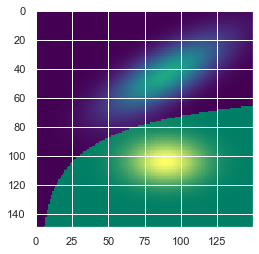

In [5]:
v = np.array(cm.viridis.colors)
g = np.array(cm.plasma.colors)

v = cm.viridis(range(256))
v = v[:,0:3]
g = cm.summer(range(256))
g = g[:,0:3]



A = 255*(Z - np.min(Z)) / (np.max(Z) - np.min(Z))
ZZ = A.astype(int)

I = np.zeros((nx,ny,3))

indx = np.argwhere(mask)
A = ZZ[mask]
for k, idx in enumerate(indx):
    I[idx[0],idx[1],:] = g[A[k]]

indx = np.argwhere(~mask)
B = ZZ[~mask]
for k, idx in enumerate(indx):
    I[idx[0],idx[1],:] = v[B[k]]
    
    
plt.imshow(I)

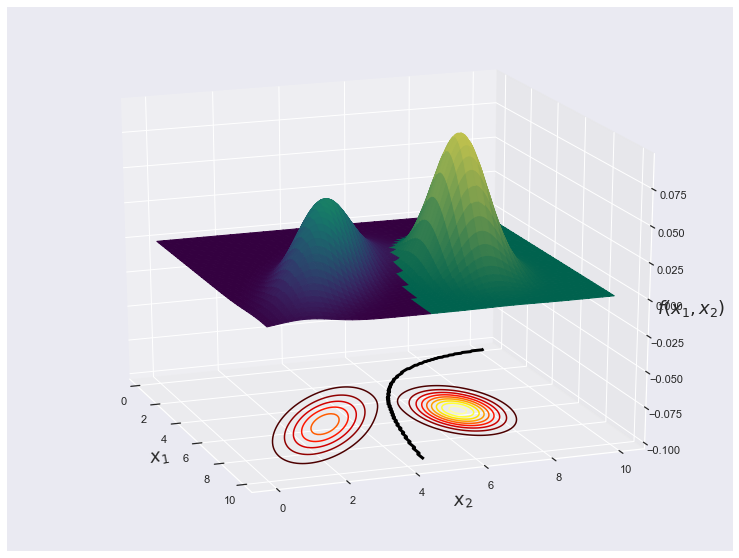

In [6]:
# Affiche la fonction de distribution normale des probabilités en 3D et ses contours en 2D
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.gca(projection='3d')

# Surface 3D au dessus
ax.plot_surface(xx,yy, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, facecolors=I)

offset = -0.1
# Contours 2D remplis en dessous
cset = ax.contour(xx, yy, Z, zdir='z', offset=offset, levels = 10, cmap='hot') 
ax.contour(xx, yy, mask, [0.5], offset=offset, linewidths=3., colors='black') 
    

ax.set_zlim(offset,np.max(Z))
#ax.set_zlim(offset,0.2)
ax.view_init(20, -20)

# # Enlève tickmarks
# ax.axes.get_xaxis().set_ticks([])
# ax.axes.get_yaxis().set_ticks([])
# ax.axes.get_zaxis().set_ticks([])

ax.set_ylabel('$x_{2}$', fontsize=18)
ax.xaxis.set_rotate_label(False)  
ax.set_xlabel('$x_{1}$', rotation=10, fontsize=18)
ax.zaxis.set_rotate_label(False)  
ax.set_zlabel('$f(x_{1},x_{2})$', rotation=0, fontsize=18)


plt.show()

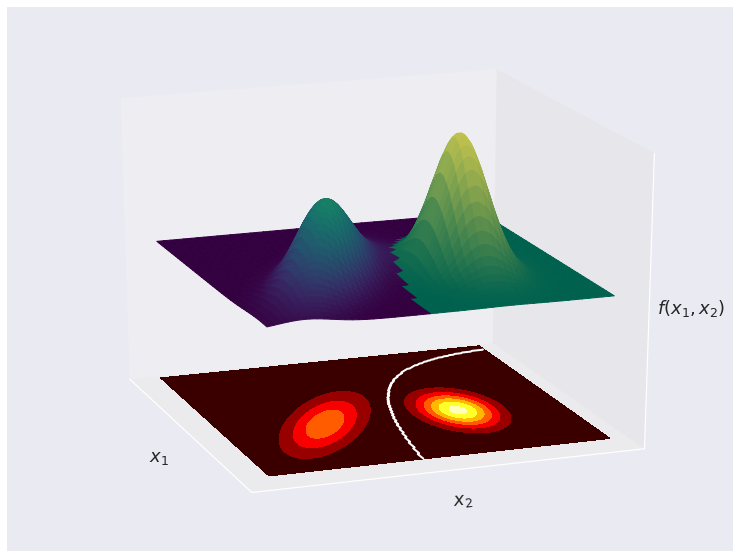

In [7]:
# Affiche la fonction de distribution normale des probabilités en 3D et ses contours en 2D
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (13,10))
ax = fig.gca(projection='3d')

# Surface 3D au dessus
#ax.plot_surface(xx,yy, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
ax.plot_surface(xx,yy, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, facecolors=I)

offset = -0.1
# Contours 2D remplis en dessous
cset = ax.contourf(xx, yy, Z, zdir='z', offset=offset, cmap=cm.hot)
ax.contour(xx, yy, mask, [0.5], offset=offset, linewidths=2., colors='white') 
    
ax.set_zlim(offset,np.max(Z))
#ax.set_zlim(offset,0.2)
ax.view_init(20, -20)

# Enlève tickmarks
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax.axes.get_zaxis().set_ticks([])

ax.spines['bottom'].set_color('0.')
ax.spines['top'].set_color('0.')
ax.spines['right'].set_color('0.')
ax.spines['left'].set_color('0.')

ax.set_ylabel('$x_{2}$', fontsize=18)
ax.xaxis.set_rotate_label(False)  
ax.set_xlabel('$x_{1}$', fontsize=18)
ax.zaxis.set_rotate_label(False)  
ax.set_zlabel('$f(x_{1},x_{2})$', fontsize=18)




# This is called everytime you release the mouse button
def on_click(event):
    print('elev = %.1f   azim = %.1f' % (ax.elev, ax.azim))

cid = fig.canvas.mpl_connect('button_release_event', on_click)


plt.show()

